# 필요한 라이브러리 호출

In [1]:
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dense, Activation

from tensorflow.keras.optimizers import RMSprop

model = Sequential()

# layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size, size, 3)),
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 이전 CNN 레이어에서 나온 3차원 배열은 1차원으로 뽑아줍니다
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001),
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(300, activation='relu'),
#   tf.keras.layers.Dense(6, activation='sigmoid')
# ])

# 배치 사이즈 / 사진 사이즈 조정

In [2]:
batch_size = 16
# batch_size = 4, 8, 16, 32
# BATCH 16 is best score!
size = 180

# Train / Test 조정 & 호출

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory('C:\\Users\\SAMSUNG\\Desktop\\MyPy\\project\\new_project\\train',
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  seed=123,
                                                  target_size=(size, size))
# train : shuffle = True, validation : shuffle = False(seed X)
test_generator =  test_datagen.flow_from_directory('C:\\Users\\SAMSUNG\\Desktop\\MyPy\\project\\new_project\\test',
                                                       batch_size=batch_size,
                                                       class_mode  = 'binary',
                                                       seed=123,
                                                       target_size = (size, size))

Found 2142 images belonging to 6 classes.
Found 721 images belonging to 6 classes.


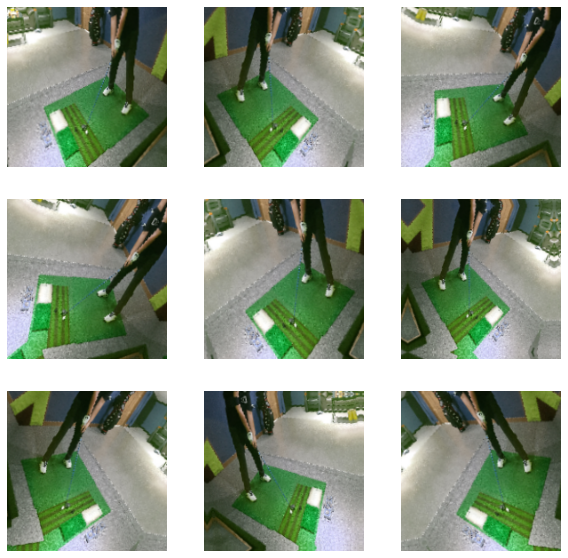

In [11]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# 클래스 확인

In [4]:
class_names = ['Billiard', 'Bowling', 'Cycling', 'Golf', 'MachineRunning', 'Pingpong']
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

print(class_labels)

nb_classes = len(class_names)
print('레이블 개수: {}'.format(nb_classes))

{'Billiard': 0, 'Bowling': 1, 'Cycling': 2, 'Golf': 3, 'MachineRunning': 4, 'Pingpong': 5}
레이블 개수: 6


# 모델 계층 구성

In [12]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow as tf
# from tensorflow.keras.layers import BatchNormalization, Activation

num_classes = 6

# 이미지 처리
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size, size, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 이전 CNN 레이어에서 나온 3차원 배열은 1차원으로 뽑아줍니다
model.add(Dropout(0.5))
model.add(Dense(726, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                  

# 모델 학습

In [14]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=40,
                    verbose=1)

Epoch 1/40
134/134 [==============================] - 206s 2s/step - loss: 1.6538 - accuracy: 0.3095 - val_loss: 1.2850 - val_accuracy: 0.3121
Epoch 2/40
134/134 [==============================] - 191s 1s/step - loss: 1.1751 - accuracy: 0.4799 - val_loss: 0.8794 - val_accuracy: 0.5811
Epoch 3/40
134/134 [==============================] - 187s 1s/step - loss: 0.9015 - accuracy: 0.5756 - val_loss: 0.7794 - val_accuracy: 0.6630
Epoch 4/40
134/134 [==============================] - 187s 1s/step - loss: 0.7970 - accuracy: 0.6214 - val_loss: 0.7495 - val_accuracy: 0.6491
Epoch 5/40
134/134 [==============================] - 186s 1s/step - loss: 0.7233 - accuracy: 0.6727 - val_loss: 0.7159 - val_accuracy: 0.6588
Epoch 6/40
134/134 [==============================] - 187s 1s/step - loss: 0.6609 - accuracy: 0.7250 - val_loss: 1.0999 - val_accuracy: 0.5049
Epoch 7/40
134/134 [==============================] - 186s 1s/step - loss: 0.5884 - accuracy: 0.7549 - val_loss: 0.4895 - val_accuracy: 0.7947

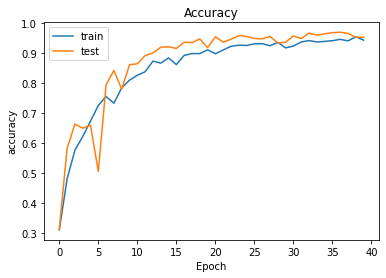

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

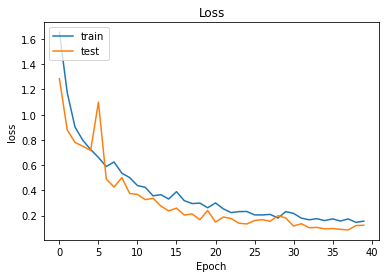

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
print('훈련 정확도는 {}% 입니다.'.format(max(history.history['accuracy'])*100))
print('테스트 정확도는 {}% 입니다.\n'.format(max(history.history['val_accuracy'])*100))

print('훈련 손실값은 {}% 입니다.'.format(min(history.history['loss'])*100))
print('테스트 손실값은 {}% 입니다.'.format(min(history.history['val_loss'])*100))

훈련 정확도는 95.42483687400818% 입니다.
테스트 정확도는 96.94868326187134% 입니다.

훈련 손실값은 14.56456333398819% 입니다.
테스트 손실값은 8.585471659898758% 입니다.


In [27]:
model.save('image_match.h5')

# 검증 (Validation)

In [17]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.)
 
val_generator = val_datagen.flow_from_directory(
    'C:\\Users\\SAMSUNG\\Desktop\\MyPy\\project\\new_project\\val',
    target_size=(size, size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary')

Found 713 images belonging to 6 classes.


In [19]:
model2.evaluate(val_generator, steps=713 // batch_size)

# val_generator의 이미지 데이터 개수와 steps 통일

44/44 [==============================] - 44s 996ms/step - loss: 0.1546 - accuracy: 0.9432


[0.15455733239650726, 0.9431818127632141]

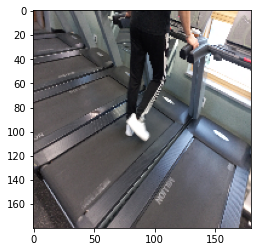

In [20]:
np.set_printoptions(suppress=True)

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
 
img_path = 'C:\\Users\\SAMSUNG\\Desktop\\MyPy\\project\\new_project\\val\\MachineRunning\\2.jpg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [21]:
prediction = model2.predict(preprocessed_img)
print(np.array(prediction[0]))

# [Billiard  Bowling  Cycling  Gofl  MachineRunning  Pingpong]

[0.00000916 0.0537554  0.99057543 0.9086449  0.9981383  0.0000001 ]


# References

In [38]:
#https://www.kaggle.com/code/wfwiggins203/hello-world-for-deep-learning-siim
#https://www.kaggle.com/code/carlolepelaars/efficientnetb5-with-keras-aptos-2019

In [39]:
# 음성 데이터 전처리 및 학습
# https://meissa.tistory.com/22